<img src='https://conteudo.imguol.com.br/c/parceiros/10/2020/06/30/fake-news-1593567030729_v2_900x506.jpg' style='height:400px'>

<div class="list-group" id="list-tab" role="tablist">
  <h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">&nbsp;Summary:</h1>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">2. Twitter Users<span class="badge badge-primary badge-pill">2</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages">3. News Structure<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages">4. Words Relevance<span class="badge badge-primary badge-pill">4</span></a>    <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="messages">5. Conclusion<span class="badge badge-primary badge-pill">5</span></a>
</div>

* thank you "preston fan" for this summary table. His profile https://www.kaggle.com/prestonfan

<a id="1"></a> <br>
<font size="+3" color="black"><b>1 - Introduction</b></font><br><a id="1"></a>
<br> 

*  I looked at the other kernels created and I was very curious why everyone has such a high score, so I suspect that the present dataset is skewed so that results to obtain such good results without needing a more robust classification model

* Based on that and to add to future work on kaggle i started i wanted to raise the main features so i can confirm my hypothesis that the dataset is skewed

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv


In [2]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [3]:
fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

* A first characteristic that I found curious was the fact that fake news has many mentions of quotes from twitter users, to see the differentiation between true and false news, I raised the amount of quotes in false and true news

<a id="1"></a> <br>
<font size="+3" color="black"><b>2 - Twitter users mentions</b></font><br><a id="2"></a>
<br> 

In [4]:
import re
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count

In [5]:
import plotly.express as px

twitter_users_fake_count = count_twitters_user(fake)
twitter_users_true_count = count_twitters_user(true)
fig = px.bar(y=[twitter_users_fake_count, twitter_users_true_count], x=['Fake', 'True'], title='Twitter user name Pattern')
fig.show()

* Regarding the real news, fake news has a much greater presence of @ twitter, the sources from which the real news was collected must be those types of forums where the news mix with twitters. So this may be one of the first features that can reinforce the fact that the dataset is biased.

* But perhaps still just the fact that mentions with @ of users would not be enough to affirm that the data is not suitable for identification of fake news, since any preprocessing that removes @ would be able to decrease the bias. So I went in search of another aspect like the text size, to see if there is a very discrepant difference between the texts.

In [6]:
from tqdm import tqdm
def text_size(df):
    sizes = []
    for text in tqdm(df['text']):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)

fake_size = text_size(fake)
true_size = text_size(true)
fake['len'] = fake_size
true['len'] = true_size

100%|██████████| 21417/21417 [00:00<00:00, 39899.99it/s]


In [7]:
true.head()

,title,text,subject,date,len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",852


In [8]:
fake['is_fake'] = 1
true['is_fake'] = 0
concat = pd.concat([fake, true])

<a id="1"></a> <br>
<font size="+3" color="black"><b>3 - News Structure</b></font><br><a id="3"></a>
<br> 

In [9]:
fig = px.box(concat, y='len', x='is_fake')
fig.show()

* Fake news in general has a lot more tokens than real ones, which is kind of weird assuming real news has a tendency to bring details about events to inform the reader, however as noted the fact that fakes news is a mix of twitters and news this may justify the fact that they have more words.

* But would that only demonstrate the bias of the dataset? because this can be resolved given that we would only work with fake news that was less than or equal to the news with more tokens, so this problem could be managed hypothetically.

* Perhaps something simple is not being observed, the presence of duplicate news !!! If this is something frequent in the data when the dataset is split, we would have samples both in the training and in the test, so it is possible to present the same samples for the model

In [10]:
from hashlib import sha256
from tqdm import tqdm
list_ = [ ]
for text in tqdm(concat['text']):
    hash_ = sha256(text.encode('utf-8')).hexdigest()
    list_.append(hash_)
concat['hash'] = list_
t = concat.groupby(['hash']).size().reset_index(name='count')
duplicate = t[t['count']>1]
print('there are ',duplicate.shape[0], 'duplicate texts')

100%|██████████| 44898/44898 [00:00<00:00, 95544.42it/s] 


there are  5140 duplicate texts


* There are actually duplicate news in the dataset but the ratio is not enough to allow the models to be as accurate, but it already contributes to the bias.

* but let's go deeper into the data, there must be some aspect of writing for the words that allow a clear differentiation, so I will observe the presence of the tokens in the true and false news

In [11]:
from tqdm import tqdm
def unique_tokens(df):
    unique_tokens = set()
    for text in tqdm(df['text']):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake = unique_tokens(fake)
unique_tokens_true = unique_tokens(true)

100%|██████████| 21417/21417 [00:02<00:00, 10265.42it/s]


In [12]:
twitter_users_fake_count = count_twitters_user(fake)
twitter_users_true_count = count_twitters_user(true)
fig = px.bar(y=[len(unique_tokens_fake), len(unique_tokens_true)], x=['Fake', 'True'], title='Unique tokens')
fig.show()

* Fake news has a lot more different tokens than the real ones, this was to be expected assuming that inside the fake there are twitters where people use, abbreviations , slang word and language addictions in non-formal writing.

* I believe it is interesting to observe the occurrence of words that do not exist in the English language to see the difference between true and false news.

In [13]:
!pip install pyenchant
!apt-get install libenchant1c2a -y

     |████████████████████████████████| 55 kB 1.6 MB/s eta 0:00:011
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en enchant libaspell15
Suggested packages:
  aspell-doc spellutils libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en enchant libaspell15 libenchant1c2a
0 upgraded, 5 newly installed, 0 to remove and 59 not upgraded.
Need to get 771 kB of archives.
After this operation, 3281 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 amd64 0.60.7~20110707-4ubuntu0.1 [309 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 aspell amd64 0.60.7~20110707-4ubuntu0.1 [87.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 aspell-en all 2017.08.24-0-0.1 [298 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libenchant1c2a amd64 1.6.0-11

In [14]:
import enchant
def check_if_exist(list_):
    d = enchant.DictWithPWL("en_US", "vocab.txt")
    count = 0
    for token in tqdm(list_):
        if not d.check(token) and not d.check(token.capitalize()):
            count+=1
    return count
count_fake = check_if_exist(unique_tokens_fake)
count_true = check_if_exist(unique_tokens_true)

100%|██████████| 178503/178503 [00:06<00:00, 26280.29it/s]


In [15]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake)-count_fake], 
                        labels=['Non exist', 'exist'], 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true)-count_true], 
                        labels=['Non exist', 'exist'], 
                        title='Real News'), row=1, col=2)
fig.show()

* More than 70% of the words in the news fakes were not found in the dictionary used for verification, it is important to make it clear that it is not a perfect dictionary but that it already brings this section that many words are really misspelled

* but so far everything that has been done has been in the data without any preprocessing, so let's apply a preprocessing that clears some characters and normalizes the text so that we can compare again

In [16]:
import nltk
import re
tqdm.pandas()
def preprocess(df):
    stopwords = nltk.corpus.stopwords.words('english')
    df['text_pre'] = df['text']
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : x.lower())
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : x.split(" "))
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : [item for item in x if item not in stopwords])
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : " ".join(x))
#    df['text_pre'] = df['text_pre'].str.replace('@[^\s]+', "")
    df['text_pre'] = df['text_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    df['text_pre'] = df['text_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['text_pre'] = df['text_pre'].str.replace('\d+', '')
    df['text_pre'] = df['text_pre'].str.replace('[^\w\s]', '')
    return df

fake = preprocess(fake)
true = preprocess(true)


/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version

100%|██████████| 21417/21417 [00:00<00:00, 81410.43it/s]


In [17]:
def unique_tokens2(df):
    unique_tokens = set()
    for text in tqdm(df['text_pre']):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake2 = unique_tokens2(fake)
unique_tokens_true2 = unique_tokens2(true)

100%|██████████| 21417/21417 [00:01<00:00, 17596.81it/s]


In [18]:
fig = px.bar(y=[len(unique_tokens_fake2), len(unique_tokens_true2)], x=['Fake', 'True'], title='Unique tokens')
fig.show()

In [19]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
count_fake = check_if_exist(unique_tokens_fake2)
count_true = check_if_exist(unique_tokens_true2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake2)-count_fake], 
                        labels=['Non exist', 'exist'], 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true2)-count_true], 
                        labels=['Non exist', 'exist'], 
                        title='Real News'), row=1, col=2)
fig.show()

100%|██████████| 78044/78044 [00:02<00:00, 26695.47it/s]


* After applying the preprocessing, it only showed the difference in the aspect of writing false news in relation to the real ones

* Since the words are so impactful let's see if there are any that stand out in relation to the others, raising the most relevant words of each type of news

<a id="1"></a> <br>
<font size="+3" color="black"><b>4 - Words Relevance</b></font><br><a id="4"></a>
<br> 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

list_fake = get_top_n_words(fake['text_pre'], 25)
list_true = get_top_n_words(true['text_pre'], 25)

In [21]:
new_list_words = [ seq[0] for seq in list_fake ]
new_list_values = [ seq[1] for seq in list_fake ]
fig = px.bar(x=new_list_words, y=new_list_values,title='Fake news frequency words')
fig.show()

In [22]:
new_list_words = [ seq[0] for seq in list_true ]
new_list_values = [ seq[1] for seq in list_true ]
fig = px.bar(x=new_list_words, y=new_list_values, title='Real news Frequency words')
fig.show()

* The most frequent words of both types of news is not very different, only the frequency is not enough to differentiate and demonstrate the bias of the data it is necessary to establish some order of importance, and for that I will use the chi2 hypothesis test to raise the most relevant words in the dataset

* but first we will see to do this in relation to the words that are misspelled to evaluate their impact on the news

In [23]:
def get_wrong_tokens(list_):
    d = enchant.DictWithPWL("en_US", "vocab.txt")
    tokens = set()
    for token in tqdm(list_):
        if not d.check(token) and not d.check(token.capitalize()):
            tokens.add(token)
    return tokens

def get_top_n_words2(corpus, n=None, vocabulary=None):
    vec = CountVectorizer(vocabulary=vocabulary).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

wrong = get_wrong_tokens(unique_tokens_true2)
wrong_true = get_top_n_words2(true['text_pre'], n=100, vocabulary=wrong)
wrong = get_wrong_tokens(unique_tokens_fake2)
wrong_fake = get_top_n_words2(fake['text_pre'], n=100, vocabulary=wrong)

new_list_words = [ seq[0] for seq in wrong_true ]
new_list_values = [ seq[1] for seq in wrong_true ]
fig = px.bar(x=new_list_words, y=new_list_values, title='Real chi2')
fig.show()

100%|██████████| 160734/160734 [00:07<00:00, 21254.50it/s]


In [24]:
new_list_words = [ seq[0] for seq in wrong_fake ]
new_list_values = [ seq[1] for seq in wrong_fake ]
fig = px.bar(x=new_list_words, y=new_list_values, title='Fake chi2')
fig.show()

* The words raised in general are acronyms that are not present in the dictionary and words that are incorrect after preprocessing

* Now we will analyze chi2 in all dataset to see which words impact the data more in relation to its relevance

In [25]:
concat2 = pd.concat([fake, true])
concat2.head()

,title,text,subject,date,len,is_fake,text_pre
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",495,1,donald trump wish americans happy new year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",305,1,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",580,1,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",444,1,christmas day donald trump announced would ba...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",420,1,pope francis used annual christmas day message...


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

vectorizer = CountVectorizer()
concat2 = pd.concat([fake, true])
X = vectorizer.fit_transform(concat2['text_pre'])
chi2score = chi2(X,concat2['is_fake'])[0]

In [27]:
wscores = dict(zip(vectorizer.get_feature_names(), chi2score))

In [28]:
dict_ = {k: v for k, v in sorted(wscores.items(), key=lambda item: item[1], reverse=True)}
keys = list(dict_.keys())
values = list(dict_.values())
fig = px.bar(x=list(keys[0:50]), y=list(values[0:50]))
fig.show()

* "said" e "reuters" are words that have a great prominence in the data set
* To better understand how the contexts of true and false news are, I will do the modeling by topics to understand if these words of greater prominence are present in well-defined topics

In [29]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
def topics(model, feature_names, no_top_words):
    dict_ = {}
    for topic_idx, topic in enumerate(model.components_):
        dict_[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return dict_
lda = LatentDirichletAllocation(random_state=42).fit(X)
topic_all = topics(lda, vectorizer.get_feature_names(), 15)


In [30]:
vectorizer_fake = CountVectorizer()
vectorizer_true = CountVectorizer()
X_fake = vectorizer_fake.fit_transform(fake['text_pre'])
X_true = vectorizer_true.fit_transform(true['text_pre'])

lda_fake = LatentDirichletAllocation(random_state=42, n_components=5).fit(X_fake)
lda_true = LatentDirichletAllocation(random_state=42, n_components=5).fit(X_true)

topic_true = topics(lda_true, vectorizer_true.get_feature_names(), 15)
topic_fake = topics(lda_fake, vectorizer_fake.get_feature_names(), 15)

In [31]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
  
def plot_clouds(dict_, title):
    for topic, words in zip(dict_.keys(), dict_.values()):
        cloud = " ".join(words)
        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white',  
                        min_font_size = 10).generate(cloud) 
  
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title(title + ' Topics '+ str(topic))
        plt.show() 

 ### Fake new topics

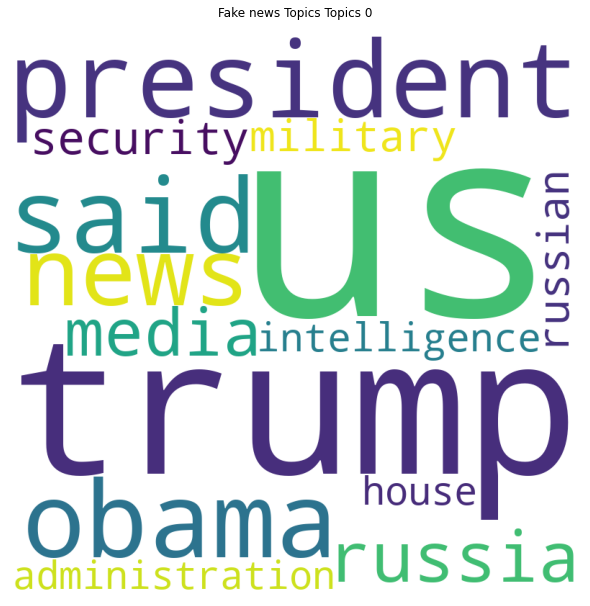

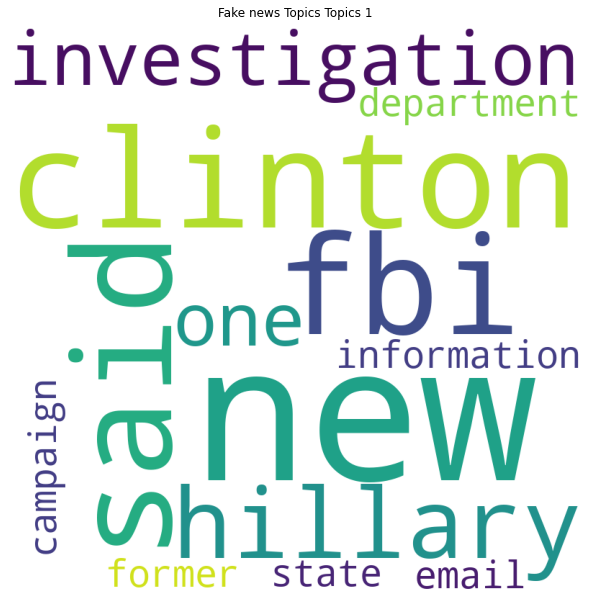

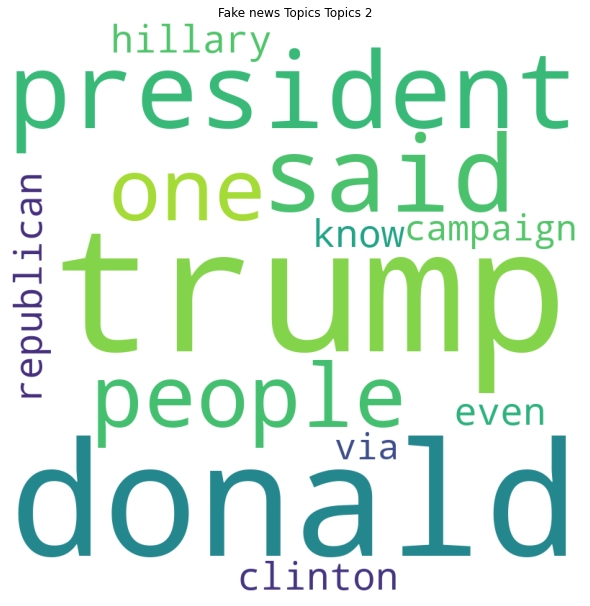

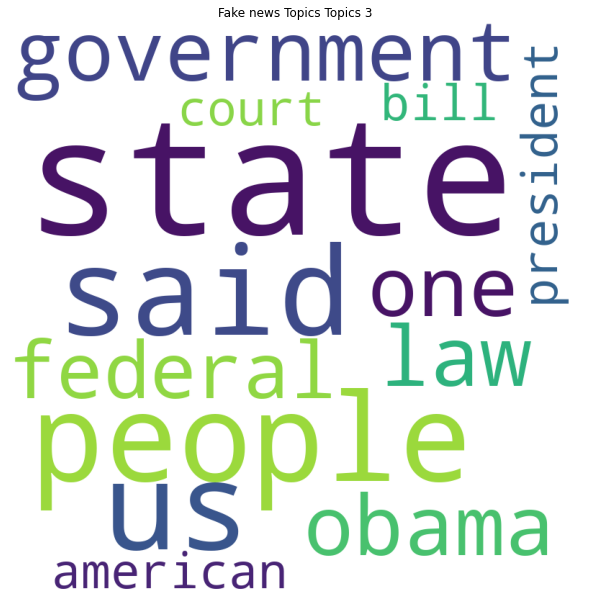

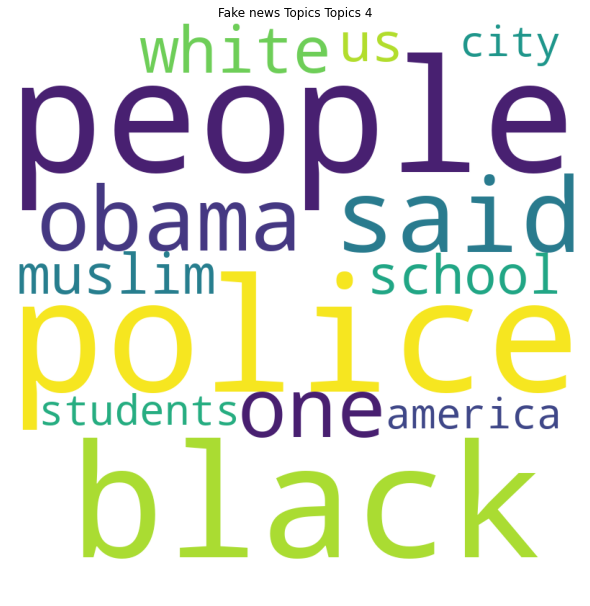

In [32]:
plot_clouds(topic_fake, 'Fake news Topics')

### Real news topics

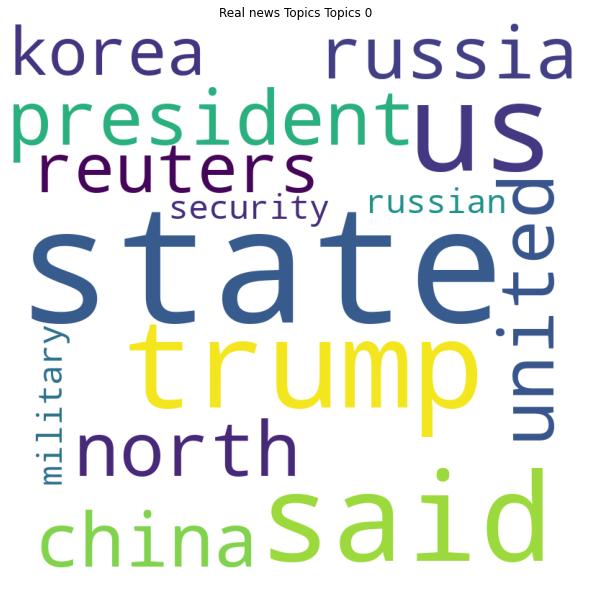

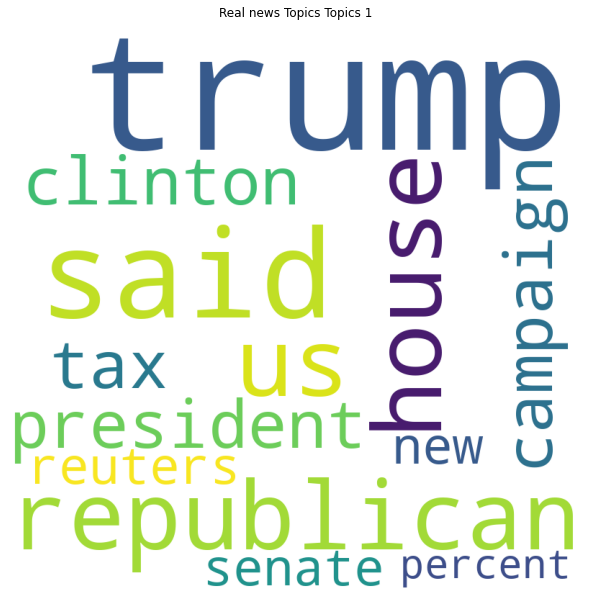

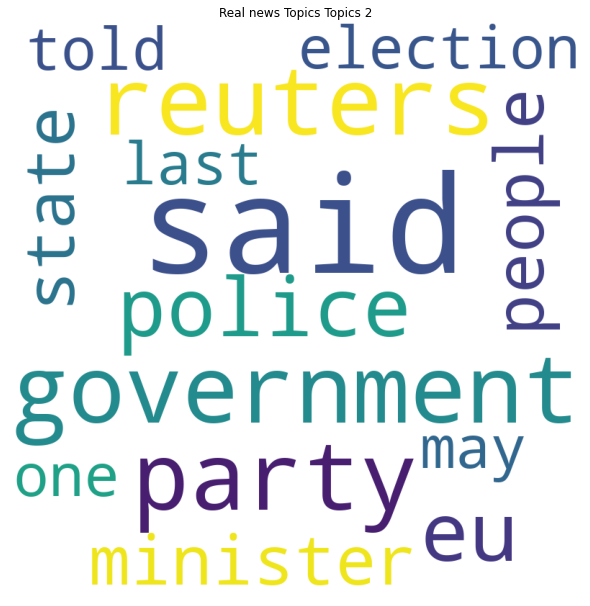

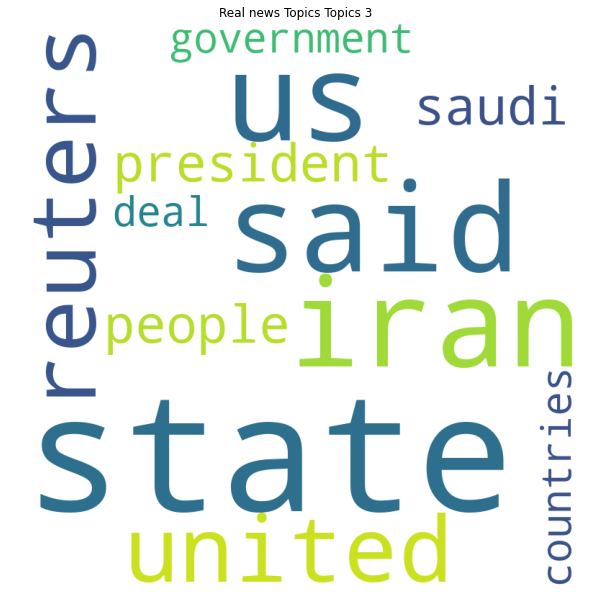

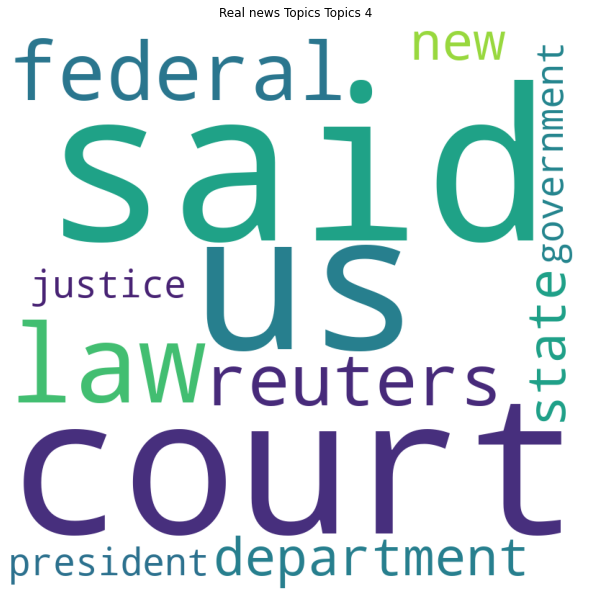

In [33]:
plot_clouds(topic_true, 'Real news Topics')

* The contexts are relatively similar, it is interesting how the topics created do not portray misspelled words or twitter users, demonstrating that at least the subjects covered can be useful for an eventual identification of fake news

* to analyze the words and their impact on the classifier, I will select every 10% of the total of features and evaluate if reducing the number of words the classifier loses performance

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
def get_ent(df):
    vocab = set()
    for text in tqdm(df['text']):
        doc = nlp(text)
        for ent in doc.ents:
            vocab.add(ent.text)
    return vocab


In [34]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


vect = TfidfVectorizer()
X = vect.fit_transform(concat2['text_pre'])
y = concat2['is_fake']


In [35]:
def select(X, y): 
    dict_ = {}
    for i in tqdm(range(1, 11)):
        value = X.shape[1] * i * 0.1
        X_new = SelectKBest(chi2, k=int(value)).fit_transform(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)
        clf = LogisticRegression()
        model = clf.fit(X_train, y_train)
        predict = model.predict(X_test)
        score = accuracy_score(y_test, predict)
        dict_[str(int(value))] = score
    return dict_

dict_ = select(X, y)

100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


In [36]:
fig = px.line(x=list(dict_.keys()), y=list(dict_.values()))
fig.show()

* Even with only 10% of the features, the classifier already shows a result of 98%, so there must be a set of words that make identification easy, to perform a more crunchy test I will only raise one feature according to chi2 and observe how a classifier based on this word behaves


In [37]:
new_feature = [] 
s = SelectKBest(chi2, k=1)
X_new = s.fit_transform(X, y)
mask = s.get_support()
for bool, feature in zip(mask, vect.get_feature_names()):
    if bool:
        new_feature.append(feature)

In [38]:
new_feature

['reuters']

* the selected word was 'reuters', I will make a classifier based on whether the reuters is present is real news if it is not false

In [39]:
result = []
for text in concat2['text_pre']:
    if 'reuters' in text:
        result.append(0)
    else:
        result.append(1)

In [40]:
accuracy_score(concat2['is_fake'], result)

0.9920931890061918

<a id="1"></a> <br>
<font size="+3" color="black"><b>5 - Conclusion</b></font><br><a id="5"></a>
<br> 
* The dataset has many features that point to bias towards fake news, apparently a poorly structured dataset that does not allow you to raise more consistent information in relation to real characteristics that fake news can present

* The fact that fake news is mixed with twitters points out a lack of care for the data, generating a dataset that is extremely simple to be able to accept high results without much engineering.

* Resulting in the end the use of a single word can allow almost 100% what is true or false news